In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip -qq "/content/drive/MyDrive/celebimg.zip"

In [ ]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torch.utils.data as data
import torchvision
import torchvision.transforms as transforms
import torchvision.datasets as datasets
import torchvision.models as models

import matplotlib.pyplot as plt
import numpy as np

import copy
from collections import namedtuple
import os
import random
import time

import cv2
from torch.utils.data import DataLoader, Dataset
from PIL import Image

import os

In [ ]:
label_dict = {
    'dog' : 0,
    'cat' : 1,
    'bear' : 2,
    'rabbit' : 3,
    'dino' : 4
}

In [ ]:
#훈련 데이터 테스트 데이터 분할
"""
1. 데이터 레이블 -> 파일 위에있는 동물로 레이블하기
"""
label_dict = {
    'dog' : 0,
    'cat' : 1,
    'bear' : 2,
    'rabbit' : 3,
    'dino' : 4
}

dog_dir = "/content/faceimage/dog"
cat_dir = "/content/faceimage/cat"
bear_dir = "/content/faceimage/bear"
rabbit_dir = "/content/faceimage/rabbit"
dino_dir = "/content/faceimage/dino"

dog_images_filepaths = sorted([os.path.join(dog_dir, f) for f in os.listdir(dog_dir)])
cat_images_filepaths = sorted([os.path.join(cat_dir, f) for f in os.listdir(cat_dir)])
bear_images_filepaths = sorted([os.path.join(bear_dir, f) for f in os.listdir(bear_dir)])
rabbit_images_filepaths = sorted([os.path.join(rabbit_dir, f) for f in os.listdir(rabbit_dir)])
dino_images_filepaths = sorted([os.path.join(dino_dir, f) for f in os.listdir(dino_dir)])

dog_imgs = []
cat_imgs = []
bear_imgs = []
rabbit_imgs = []
dino_imgs = []


for d in dog_images_filepaths:
  dog_imgs+= sorted([os.path.join(d, f) for f in os.listdir(d)])

for d in cat_images_filepaths:
  cat_imgs+= sorted([os.path.join(d, f) for f in os.listdir(d)])

for d in bear_images_filepaths:
  bear_imgs+= sorted([os.path.join(d, f) for f in os.listdir(d)])

for d in rabbit_images_filepaths:
  rabbit_imgs+= sorted([os.path.join(d, f) for f in os.listdir(d)])

for d in dino_images_filepaths:
  dino_imgs+= sorted([os.path.join(d, f) for f in os.listdir(d)])

In [ ]:
"""
ImageNet 데이터셋의
  평균: [0.485, 0.456, 0.406]
  표준편차: [0.229, 0.224, 0.225]
"""
size = 224
mean = (0.485, 0.456, 0.406)
std = (0.229, 0.224, 0.225)
batch_size = 32


In [ ]:
class ImageTransform() :
    def __init__(self, resize, mean, std) :
        self.data_transform = {
            'train' : transforms.Compose([
                transforms.RandomResizedCrop(resize, scale=(0.5, 1.0)),
                # transforms.RandomRotation(degrees=random.randint(0,180)),
                transforms.RandomHorizontalFlip(),
                transforms.Resize(resize),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
            ]),
            'val' : transforms.Compose([
                transforms.Resize(256),
                transforms.CenterCrop(resize),
                transforms.ToTensor(),
                transforms.Normalize(mean, std)
            ])
        }

    def __call__(self, img, phase) :
        return self.data_transform[phase](img)

In [ ]:
model = torch.load('/content/resnet18_80per (1).pt')


class for_onnx(nn.Module):
  def __init__(self, model) :
    super().__init__()
    self.tf = transforms.Compose([
                  transforms.Resize(256),
                  transforms.CenterCrop(224),
                  transforms.ToTensor(),
                  transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
              ])
    self.model = model

  def forward(self, x) :
    print(x)
    x = self.tf(x)
    print(x)
    x = model(x)

    return x

test_model = for_onnx(model)


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)
Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to /root/.cache/torch/hub/checkpoints/resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:00<00:00, 352MB/s]


RuntimeError: ignored

In [ ]:
tf = transforms.Compose([
                  transforms.Resize(256),
                  transforms.CenterCrop(224),
                  transforms.ToTensor(),
                  transforms.Normalize((0.485, 0.456, 0.406), (0.229, 0.224, 0.225))
              ])
tf(img).shape

torch.Size([3, 224, 224])

In [ ]:
img = Image.open('/content/0.png')

test_model(img)

<PIL.PngImagePlugin.PngImageFile image mode=RGB size=256x256 at 0x7FAF819BFF70>
tensor([[[ 0.7762,  0.8789,  0.9303,  ..., -1.3644, -1.3987, -1.3987],
         [ 0.7762,  0.8447,  0.9303,  ..., -1.4158, -1.3815, -1.3815],
         [ 0.8276,  0.8276,  0.8961,  ..., -1.4158, -1.3473, -1.3644],
         ...,
         [-1.5528, -1.5185, -1.4500,  ..., -1.0733, -1.0219, -1.1247],
         [-1.5357, -1.4843, -1.4500,  ..., -1.0562, -0.9705, -1.0562],
         [-1.4672, -1.5014, -1.4672,  ..., -1.0904, -0.9192, -0.9020]],

        [[ 0.3102,  0.4153,  0.4503,  ..., -1.5630, -1.5980, -1.5980],
         [ 0.3102,  0.3627,  0.4153,  ..., -1.5980, -1.5805, -1.5805],
         [ 0.3452,  0.3627,  0.3803,  ..., -1.5980, -1.5455, -1.5630],
         ...,
         [-1.6856, -1.6681, -1.5805,  ..., -1.2829, -1.2654, -1.3704],
         [-1.6506, -1.6331, -1.5805,  ..., -1.3529, -1.2129, -1.2829],
         [-1.5805, -1.6155, -1.5805,  ..., -1.3880, -1.1779, -1.1429]],

        [[ 0.1651,  0.2522,  0.2871,

TypeError: ignored

In [ ]:
class CelebImgDataset(Dataset) :
    def __init__(self, file_list, transform=None, phase='train') :
        self.file_list = file_list
        self.transform = transform
        self.phase = phase

    def __len__(self) :
        return len(self.file_list)


    def __getitem__(self, idx) :
        img_path = self.file_list[idx]
        img = Image.open(img_path)
        img_transformed = self.transform(img, self.phase)

        animal_label = img_path.split('/')[3]
        # celeb_lable = img_path.split('/')[4]

        label=0
        if animal_label == "dog" :
            animal_label = 0

        elif animal_label == 'cat' :
            animal_label = 1

        elif animal_label == 'bear' :
            animal_label = 2

        elif animal_label == 'rabbit' :
            animal_label = 3

        elif animal_label == 'dino' :
            animal_label = 4

        # one_hot = torch.zeros(5)  # 모든 원소가 0인 벡터 생성
        # one_hot[animal_label] = 1

        return img_transformed, animal_label #,celeb_lable

NameError: ignored

In [ ]:
images_path = [*dog_imgs, *cat_imgs, *bear_imgs, *rabbit_imgs, *dino_imgs ]

random.seed(42)
random.shuffle(images_path)

In [ ]:
# file_list = images_path[0]

# img_path = file_list
# img = Image.open(img_path)
# print(type(img)) #-> <class 'PIL.PngImagePlugin.PngImageFile'>
# img_transformed = transform(img, 'train')

In [ ]:
#ratio
def split_dataset(imgs,train_ratio=0.7, val_ratio=0.15, test_ration=0.15):
  train_idx = int(len(imgs)*train_ratio)
  val_idx = train_idx + int(len(imgs)*val_ratio)

  train_dataset = imgs[:train_idx]
  val_dataset = imgs[train_idx:val_idx]
  test_dataset = imgs[val_idx:]

  return (train_dataset, val_dataset, test_dataset)

In [ ]:
train_images, val_images, test_images = split_dataset(images_path,0.7,0.2,0.1)

train_dataset = CelebImgDataset(train_images, transform=ImageTransform(size, mean, std),
                                 phase='train')
val_dataset = CelebImgDataset(val_images, transform=ImageTransform(size, mean, std),
                                 phase='val')

print(len(train_dataset),len(val_dataset),len(test_images))

3500 1000 500


In [ ]:
train_iterator = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
valid_iterator = DataLoader(val_dataset, batch_size=batch_size, shuffle=True)

In [ ]:
batch_iterator = iter(train_iterator)
inputs, label = next(batch_iterator)

In [ ]:
inputs.size()

torch.Size([32, 3, 224, 224])

0


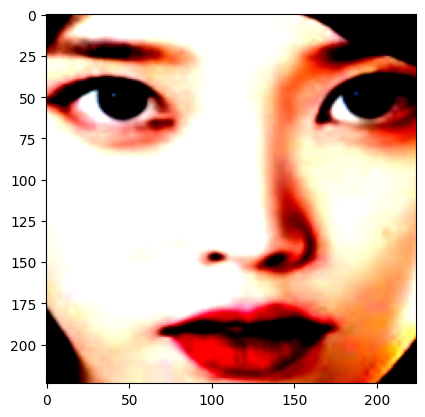

In [ ]:
index = 68
print(train_dataset.__getitem__(index)[1])
# print(train_dataset.__getitem__(index)[2])
plt.imshow(train_dataset.__getitem__(index)[0].permute(1,2,0))
plt.show()

In [ ]:
class Bottleneck(nn.Module) :
    expansion = 4 # 병목 블록을 정의하기 위한 하이퍼파라미터

    def __init__(self, in_channels, out_channels, stride=1, downsample=False) :
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=1,
                              stride=1, bias=False) # 1x1 합성곱층
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3,
                              stride=stride, padding=1, bias=False)

        self.bn2 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3,
                              stride=stride, padding=1, bias=False)
        self.conv3 = nn.Conv2d(out_channels, self.expansion * out_channels,
                               kernel_size=1, stride=1, bias=False)
        self.bn3 = nn.BatchNorm2d(self.expansion*out_channels)
        self.relu = nn.ReLU(inplace=True)

        if downsample :
            conv = nn.Conv2d(in_channels, self.expansion*out_channels, kernel_size=1,
                            stride=stride, bias=False)
            bn = nn.BatchNorm2d(self.expansion*out_channels)
            downsample = nn.Sequential(conv, bn)
        else :
            downsample = None

        self.downsample = downsample

    def forward(self, x) :
        i = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)
        x = self.relu(x)
        x = self.conv3(x)
        x = self.bn3(x)

        if self.downsample is not None :
            i = self.downsample(i)

        x += i
        x = self.relu(x)

        return x

In [ ]:
class BasicBlock(nn.Module) :
    expansion = 1

    def __init__(self, in_channels, out_channels, stride=1, downsample=False) :
        super().__init__()
        self.conv1 = nn.Conv2d(in_channels, out_channels, kernel_size=3,
                              stride=stride, padding=1, bias=False)
        self.bn1 = nn.BatchNorm2d(out_channels)
        self.conv2 = nn.Conv2d(out_channels, out_channels, kernel_size=3,
                              stride=1, padding=1, bias=False)
        self.bn2 = nn.BatchNorm2d(out_channels)
        self.relu = nn.ReLU(inplace=True)

        if downsample : # 다운샘플이 적용되는 부분(출력 데이터크기가 다를 경우 사용)
            conv = nn.Conv2d(in_channels, out_channels, kernel_size=1,
                            stride=stride, bias=False)

            bn = nn.BatchNorm2d(out_channels)
            downsample = nn.Sequential(conv, bn)

        else :
            downsample = None
        self.downsample = downsample

    def forward(self, x) :
        i = x
        x = self.conv1(x)
        x = self.bn1(x)
        x = self.relu(x)
        x = self.conv2(x)
        x = self.bn2(x)

        if self.downsample is not None :
            i = self.downsample(i)

        x += i # identity mapping
        x = self.relu(x)

        return x

In [ ]:
class ResNet(nn.Module) :
   def __init__(self, config, output_dim, zero_init_residual=False) :
       super().__init__()

       block, n_blocks, channels = config
       self.in_channels = channels[0]
      #  assert len(n_blocks) == len(channels) == 4

       self.conv1 = nn.Conv2d(3, self.in_channels, kernel_size=7, stride=2,
                             padding=3, bias=False)
       self.bn1 = nn.BatchNorm2d(self.in_channels)
       self.relu = nn.ReLU(inplace=True)
       self.maxpool = nn.MaxPool2d(kernel_size=3, stride=2, padding=1)

       self.layer1 = self.get_resnet_layer(block, n_blocks[0], channels[0])
       self.layer2 = self.get_resnet_layer(block, n_blocks[1], channels[1], stride=2)
       self.layer3 = self.get_resnet_layer(block, n_blocks[1], channels[2], stride=2)
       self.layer4 = self.get_resnet_layer(block, n_blocks[1], channels[3], stride=2)

       self.avgpool = nn.AdaptiveAvgPool2d((1, 1))
       self.fc = nn.Linear(self.in_channels, output_dim)


       if zero_init_residual :
           for m in self.modules() :
               if isinstance(m, Bottleneck) :
                   nn.init.constant_(m.bn3.weight, 0)
               elif isinstance(m, BasicBlock) :
                   nn.init.constant_(m.bn2.weight, 0)

   def get_resnet_layer(self, block, n_blocks, channels, stride=1) :
       layers = []
       if self.in_channels != block.expansion * channels :
           downsample = True
       else :
           downsample = False

       layers.append(block(self.in_channels, channels, stride, downsample))

       for i in range(1, n_blocks) :
           layers.append(block(block.expansion*channels, channels))

       self.in_channels = block.expansion * channels
       return nn.Sequential(*layers)


   def forward(self, x) :
       x = self.conv1(x)
       x = self.bn1(x)
       x = self.relu(x)
       x = self.maxpool(x)
       x = self.layer1(x)
       x = self.layer2(x)
       x = self.layer3(x)
       x = self.layer4(x)
       x = self.avgpool(x)
       h = x.view(x.shape[0], -1)
       x = self.fc(h)
       return x, h

ResNetConfig = namedtuple('ResNetConfig', ['block', 'n_blocks', 'channels'])

In [ ]:
resnet18_config = ResNetConfig(block=BasicBlock,
                             n_blocks=[2, 2, 2, 2,],
                             channels=[64, 128, 256, 512])
output_dim = 5
model = ResNet(resnet18_config, output_dim)



In [ ]:
resnet18_config = ResNetConfig(block=BasicBlock,
                             n_blocks=[2, 2, 2, 2,],
                             channels=[64, 128, 256, 512])

resnet34_config = ResNetConfig(block=BasicBlock,
                             n_blocks=[3, 4, 6, 3,],
                             channels=[64, 128, 256, 512])

resnet50_config = ResNetConfig(block=Bottleneck,
                             n_blocks=[3, 4, 6, 3],
                             channels=[64,128,256,512])

resnet152_config = ResNetConfig(block=Bottleneck,
                              n_blocks=[3,8,36,3],
                              channels=[64,128,256,512])

In [ ]:
def calculate_topk_accuracy(y_pred, y, k=2) :
    with torch.no_grad() :
        batch_size = y.shape[0]
        _, top_pred = y_pred.topk(k, 1)
        top_pred = top_pred.t()
        correct = top_pred.eq(y.view(1, -1).expand_as(top_pred))
        correct_1 =    correct[:1].reshape(-1).float().sum(0, keepdim=True)
        correct_k = correct[:k].reshape(-1).float().sum(0, keepdim=True)
        acc_1 = correct_1 / batch_size
        acc_k = correct_k / batch_size

    return acc_1, acc_k

In [ ]:

def train(model, iterator, optimizer, criterion, device) :
    epoch_loss = 0
    epoch_acc_1 = 0
    epoch_acc_5 = 0
    model.train()
    for (x, y) in iterator :
        x = x.to(device)
        y = y.to(device)

        optimizer.zero_grad()
        y_pred = model(x)
        loss = criterion(y_pred[0], y)

        acc_1, acc_5 = calculate_topk_accuracy(y_pred[0], y)
        loss.backward()
        optimizer.step()

        epoch_loss += loss.item()
        epoch_acc_1 += acc_1.item()
        epoch_acc_5 += acc_5.item()

    epoch_loss /= len(iterator)
    epoch_acc_1 /= len(iterator)
    epoch_acc_5 /= len(iterator)

    return epoch_loss, epoch_acc_1, epoch_acc_5

In [ ]:
def evaluate(model, iterator, criterion, device) :
    epoch_loss = 0
    epoch_acc_1 = 0
    epoch_acc_5 = 0

    model.eval()
    with torch.no_grad() :
        for (x, y) in iterator :
            x = x.to(device)
            y = y.to(device)
            y_pred = model(x)
            loss = criterion(y_pred[0], y)
            acc_1, acc_5 = calculate_topk_accuracy(y_pred[0], y)
            epoch_loss += loss.item()
            epoch_acc_1 += acc_1.item()
            epoch_acc_5 += acc_5.item()

        epoch_loss /=len(iterator)
        epoch_acc_1 /= len(iterator)
        epoch_acc_5 /= len(iterator)

        return epoch_loss, epoch_acc_1, epoch_acc_5

In [ ]:
def epoch_time(start_time, end_time) :
    elapsed_time = end_time - start_time
    elapsed_mins = int(elapsed_time / 60)
    elapsed_secs = int(elapsed_time - (elapsed_mins * 60))
    return elapsed_mins, elapsed_secs

In [ ]:
output_dim = 5
model = ResNet(resnet18_config, output_dim)
# print(model)
# optimizer = optim.Adam(model.parameters(), lr=1e-7)
criterion = nn.CrossEntropyLoss()

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model = model.to(device)
criterion = criterion.to(device)

In [ ]:
train_acc1_list,train_acc5_list, train_loss_list = [],[],[]
valid_acc1_list,valid_acc5_list, valid_loss_list = [],[],[]
optimizer = optim.Adam(model.parameters(), lr=1e-3)
best_valid_loss = float('inf')

In [ ]:
# 0.01 100번 -> test_accuracy :  70.93%


epochs = 60

for epoch in range(epochs) :
  start_time = time.monotonic()

  train_loss, train_acc_1, train_acc_5 = train(model, train_iterator, optimizer,
                                              criterion, device)
  valid_loss, valid_acc_1, valid_acc_5 = evaluate(model, valid_iterator, criterion,
                                                device)

  train_acc1_list.append(train_acc_1)
  train_acc5_list.append(train_acc_5)
  train_loss_list.append(train_loss)

  valid_acc1_list.append(valid_acc_1)
  valid_acc5_list.append(valid_acc_5)
  valid_loss_list.append(valid_loss)

  if valid_loss < best_valid_loss :
      best_valid_loss = valid_loss
      torch.save(model.state_dict(), './resnet_Model.pt')

  end_time = time.monotonic()
  epoch_mins, epoch_secs = epoch_time(start_time, end_time)




  print(f'Epoch : {epoch+1:02} | Epoch Time : {epoch_mins}m {epoch_secs}s')
  print(f'\tTrain Loss : {train_loss:.3f} | Train Acc @1 : {train_acc_1*100:6.2f}% | Train Acc @5 : {train_acc_5*100:6.2f}%')
  print(f'\tValid Loss : {valid_loss:.3f} | Valid Acc @1 : {valid_acc_1*100:6.2f}% | Valid Acc @5 : {valid_acc_5*100:6.2f}%')



Epoch : 01 | Epoch Time : 0m 40s
	Train Loss : 1.655 | Train Acc @1 :  27.02% | Train Acc @5 :  48.45%
	Valid Loss : 1.727 | Valid Acc @1 :  26.76% | Valid Acc @5 :  48.63%
Epoch : 02 | Epoch Time : 0m 35s
	Train Loss : 1.592 | Train Acc @1 :  28.83% | Train Acc @5 :  49.35%
	Valid Loss : 1.578 | Valid Acc @1 :  27.25% | Valid Acc @5 :  48.05%
Epoch : 03 | Epoch Time : 0m 33s
	Train Loss : 1.619 | Train Acc @1 :  27.02% | Train Acc @5 :  48.18%
	Valid Loss : 1.700 | Valid Acc @1 :  23.63% | Valid Acc @5 :  43.46%
Epoch : 04 | Epoch Time : 0m 32s
	Train Loss : 1.569 | Train Acc @1 :  28.65% | Train Acc @5 :  50.20%
	Valid Loss : 1.579 | Valid Acc @1 :  29.88% | Valid Acc @5 :  52.64%
Epoch : 05 | Epoch Time : 0m 33s
	Train Loss : 1.555 | Train Acc @1 :  29.56% | Train Acc @5 :  52.88%
	Valid Loss : 1.528 | Valid Acc @1 :  31.74% | Valid Acc @5 :  52.93%
Epoch : 06 | Epoch Time : 0m 32s
	Train Loss : 1.544 | Train Acc @1 :  31.00% | Train Acc @5 :  52.94%
	Valid Loss : 1.528 | Valid Acc 

In [ ]:
from collections import defaultdict

# int형 딕셔너리 생성

import pandas as pd

id_list = []
pred_list = []
_id = 0

iter_count = 0
cor_count = 0


fail_table = defaultdict(int)
animal_table = defaultdict(int)

with torch.no_grad() :
    for test_path in test_images :
        img = Image.open(test_path)

        _id = label_dict[test_path.split('/')[3]]
        transform = ImageTransform(size, mean, std)
        img = transform(img, phase='val')
        img = img.unsqueeze(0)

        img = img.to(device)

        model.eval()
        outputs = model(img)

        preds = F.softmax(outputs[0], dim=1).argmax(dim=1)
        id_list.append(_id)
        pred_list.append(preds[0].item())

        if preds == _id:
          cor_count += 1
        else:
          i = str(preds.item())+str(_id)
          fail_table[i] += 1
          animal_table[_id] += 1
        iter_count += 1

print(f'test_set_accuracy : {cor_count/iter_count*100}%')


test_set_accuracy : 80.2%


In [ ]:
print(f'test_set')

test_set


In [ ]:
sorted_list = sorted(fail_table.items(), key=lambda x: x[1], reverse=True)
# print(sorted_list)
animal_table

defaultdict(int, {0: 31, 3: 26, 4: 21, 1: 10, 2: 11})

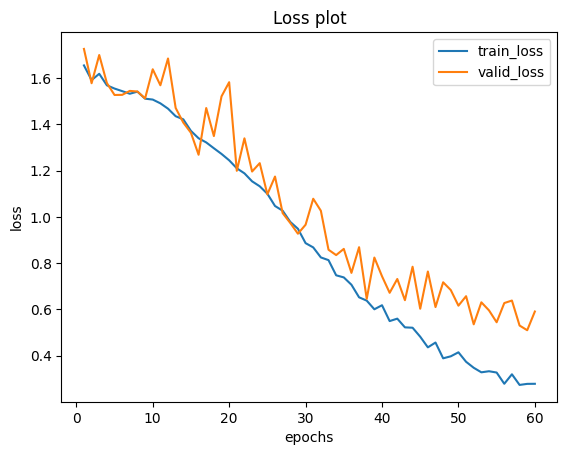

In [ ]:
x = list(range(1, 61))

# plt.plot(x, train_acc1_list, label='train_acc_1')
# plt.plot(x, train_acc5_list, label='train_acc_5')
plt.plot(x, train_loss_list, label='train_loss')
# plt.plot(x, y3, label='line 3')


# plt.plot(x, valid_acc1_list, label='valid_acc_1')
# plt.plot(x, valid_acc5_list, label='valid_acc_5')
plt.plot(x, valid_loss_list, label='valid_loss')
# x, y 라벨 설정
plt.xlabel("epochs")
plt.ylabel("loss")

# 그래프 타이틀 설정
plt.title("Loss plot")

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

In [ ]:
x = list(range(1, 101))

plt.plot(x, train_acc1_list, label='line 1')
plt.plot(x, train_acc5_list, label='line 2')
# plt.plot(x, y3, label='line 3')
print(train_acc1_list==train_acc5_list)
# x, y 라벨 설정
plt.xlabel("epochs")
plt.ylabel("Y-axis label")

# 그래프 타이틀 설정
plt.title("Accuracy plot")

# 범례 표시
plt.legend()

# 그래프 표시
plt.show()

In [ ]:
test_img_loc = './testimg.png'
img = Image.open(test_img_loc)
transform = ImageTransform(size, mean, std)
plt.show(img)
imshow()
img = transform(img, phase='val')
img = img.unsqueeze(0)
img = img.to(device)
model.eval()
outputs = model(img)
print(outputs)

In [ ]:
import pandas as pd
id_list = []
pred_list = []
_id = 0

iter_count = 0
cor_count = 0

with torch.no_grad() :
    for test_path in test_images :
        img = Image.open(test_path)
        # print(test_path)
        _id = label_dict[test_path.split('/')[3]]
        transform = ImageTransform(size, mean, std)
        img = transform(img, phase='val')
        img = img.unsqueeze(0)

        img = img.to(device)

        model1.eval()
        outputs = model2(img)
        # print(outputs)
        preds = F.softmax(outputs[0], dim=1).argmax(dim=1)
        id_list.append(_id)
        pred_list.append(preds[0].item())
        # if iter_count==0:
        #   break
        if preds == _id:
          cor_count += 1
        iter_count += 1

In [ ]:
print(f"test_accuracy : {cor_count/iter_count * 100.:6.2f}%")